In [40]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd


In [41]:
sales = pd.read_csv("training.csv")

In [42]:
print(sales.head())
print(sales.info())
print(sales.describe())

        store_ID  day_of_week        date  nb_customers_on_day  open  \
425390       366            4  2013-04-18                  517     1   
291687       394            6  2015-04-11                  694     1   
411278       807            4  2013-08-29                  970     1   
664714       802            2  2013-05-28                  473     1   
540835       726            4  2013-10-10                 1068     1   

        promotion state_holiday  school_holiday  sales  
425390          0             0               0   4422  
291687          0             0               0   8297  
411278          1             0               0   9729  
664714          1             0               0   6513  
540835          1             0               0  10882  
<class 'pandas.core.frame.DataFrame'>
Index: 640840 entries, 425390 to 305711
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   store_ID  

In [43]:
print(sales.shape)
print(sales.columns)
display(sales.dtypes)



(640840, 9)
Index(['store_ID', 'day_of_week', 'date', 'nb_customers_on_day', 'open',
       'promotion', 'state_holiday', 'school_holiday', 'sales'],
      dtype='object')


store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
sales                   int64
dtype: object

In [53]:
# show unique values in state_holiday column
sales.state_holiday.unique()

# show value counts for state_holiday column
sales['state_holiday'].value_counts()



state_holiday
0    621160
a     12842
b      4214
c      2624
Name: count, dtype: int64

In [59]:
missing_counts = sales.isna().sum() # Calculate missing values per column
print(missing_counts)


store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
dtype: int64


In [ ]:
corr_matrix = sales.corr(numeric_only=True) # Compute correlation matrix
print(corr_matrix)

                     store_ID  day_of_week  nb_customers_on_day      open  \
store_ID             1.000000     0.000329             0.023605 -0.001108   
day_of_week          0.000329     1.000000            -0.385616 -0.527947   
nb_customers_on_day  0.023605    -0.385616             1.000000  0.617264   
open                -0.001108    -0.527947             0.617264  1.000000   
promotion           -0.000364    -0.392736             0.315858  0.294936   
school_holiday      -0.000706    -0.206069             0.071085  0.085213   
sales                0.004804    -0.461107             0.894872  0.678463   

                     promotion  school_holiday     sales  
store_ID             -0.000364       -0.000706  0.004804  
day_of_week          -0.392736       -0.206069 -0.461107  
nb_customers_on_day   0.315858        0.071085  0.894872  
open                  0.294936        0.085213  0.678463  
promotion             1.000000        0.066565  0.451819  
school_holiday        0.06656

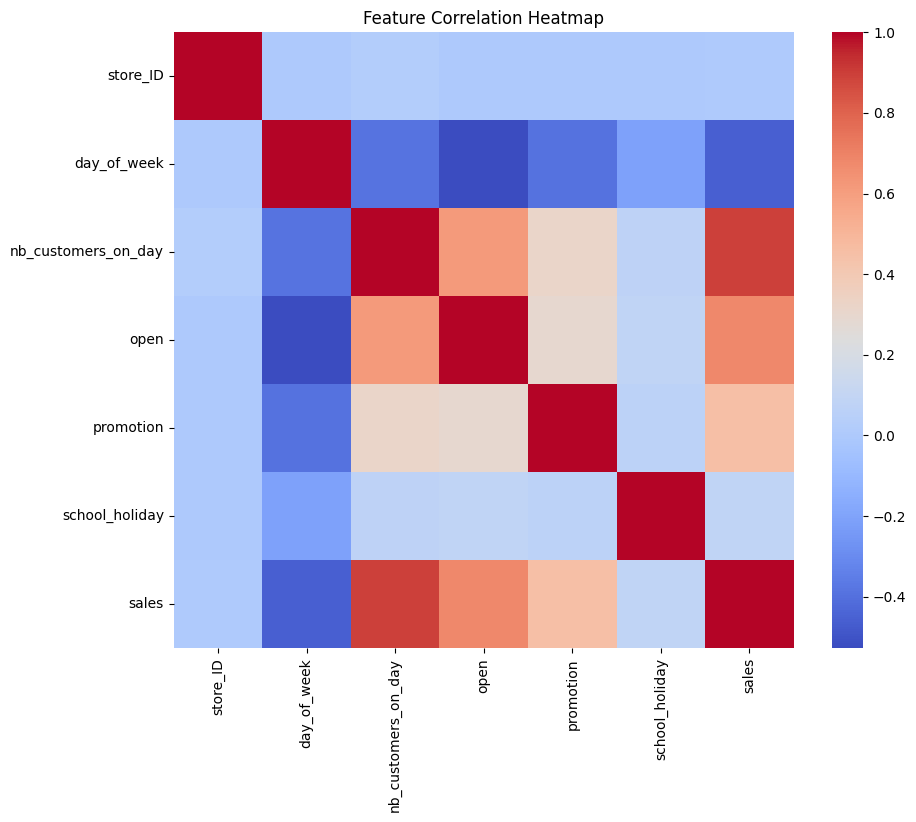

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
high_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr < 1]  # exclude self-correlation
high_corr[high_corr > 0.8].head(10)

nb_customers_on_day  sales                  0.894872
sales                nb_customers_on_day    0.894872
dtype: float64

In [47]:
sales.columns


Index(['store_ID', 'day_of_week', 'date', 'nb_customers_on_day', 'open',
       'promotion', 'state_holiday', 'school_holiday', 'sales'],
      dtype='object')

In [54]:
pd.get_dummies(sales, columns=['state_holiday'], prefix='state_holiday')

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,school_holiday,sales,state_holiday_0,state_holiday_a,state_holiday_b,state_holiday_c
425390,366,4,2013-04-18,517,1,0,0,4422,True,False,False,False
291687,394,6,2015-04-11,694,1,0,0,8297,True,False,False,False
411278,807,4,2013-08-29,970,1,1,0,9729,True,False,False,False
664714,802,2,2013-05-28,473,1,1,0,6513,True,False,False,False
540835,726,4,2013-10-10,1068,1,1,0,10882,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
359783,409,6,2013-10-26,483,1,0,0,4553,True,False,False,False
152315,97,1,2014-04-14,987,1,1,0,12307,True,False,False,False
117952,987,1,2014-07-07,925,1,0,0,6800,True,False,False,False
435829,1084,4,2014-06-12,725,1,0,0,5344,True,False,False,False


In [63]:
sales_dummy.head()

sales_dummy.dtypes.value_counts()


bool     944
int64      7
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split


